In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob

In [2]:
#-----------------------------------------------------------------
# Função criada para plotar as imagens
#-----------------------------------------------------------------
# ENTRADA
# imgs_list = lista contendo os paths das imgs
# is_rbg = bool informando se a imagem é colorida ou não
#
# RETORNO
# plot das imagens 
#-----------------------------------------------------------------

def plot_imgs(imgs_list, is_rgb):
    
    fig=plt.figure(figsize=(15, 15))
    columns = len(imgs_list)
    
    if(is_rgb):
        for i in range(columns):
            fig.add_subplot(1, columns, i+1)
            
            image = cv2.imread(imgs_list[i])
            image_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
            plt.imshow(image_rgb) 
        plt.show()
    else:
        for i in range(columns):
            fig.add_subplot(1, columns, i+1)
            image = cv2.imread(imgs_list[i])
            plt.imshow(image)  
        plt.show()

In [3]:
#-----------------------------------------------------------------
# Função criada para a transformação 1.1
#-----------------------------------------------------------------
# ENTRADA
# path_image = path da imgem rgb na quala transformação será aplicada
# path_save = path onde o resultado da transformação será salvo
# name_save = nome do arquivo que iremos salvar
#
# RETORNO
# Salva as imagens com a transformação aplicada
#-----------------------------------------------------------------

def transform_1(path_image, path_save, name_save):
    image = cv2.imread(path_image)
    image_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    
    transform_1 = np.array([[0.393, 0.769, 0.189],
                             [0.349, 0.686, 0.168],
                             [0.272, 0.534, 0.131]])

    new_img = image_rgb.dot(transform_1.T)

    new_img[new_img > 255] = 255
    new_img = new_img/new_img.max()
    
    plt.imsave(path_save+name_save, new_img)

In [4]:
#-----------------------------------------------------------------
# Função criada para a transformação 1.2
#-----------------------------------------------------------------
# ENTRADA
# path_image = path da imgem rgb na quala transformação será aplicada
# path_save = path onde o resultado da transformação será salvo
# name_save = nome do arquivo que iremos salvar
#
# RETORNO
# Salva as imagens com a transformação aplicada
#-----------------------------------------------------------------

def transform_2(path_image, path_save, name_save):
    image = cv2.imread(path_image)
    image_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    
    transform_2 = np.array([0.2989, 0.5870, 0.1140])
    
    new_img = np.dot(image_rgb, transform_2)
    
    plt.imsave(path_save+name_save, new_img, cmap = plt.get_cmap(name = 'gray'))

In [5]:
#paths onde estão localizadas as imagens
path_bw = 'imgs/bw/'
path_color = 'imgs/color/'

#obtendo a lista com os nomes dos arquivos
bw_imgs = [f for f in glob.glob(path_bw + "*.png")]
color_imgs = [f for f in glob.glob(path_color + "*.png")]

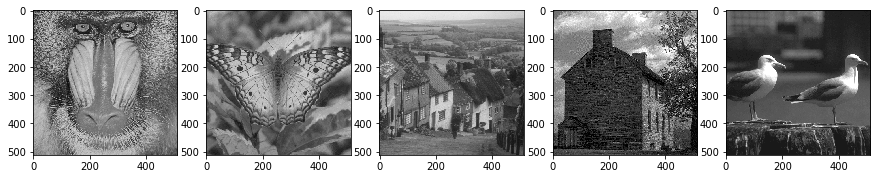

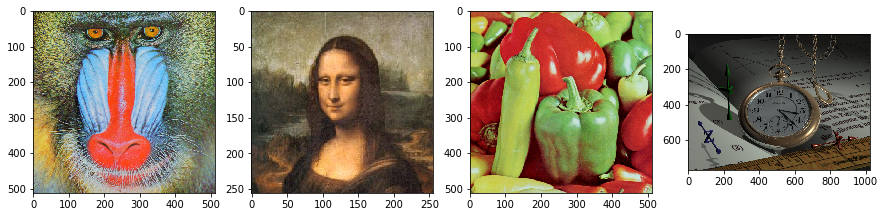

In [10]:
plot_imgs(bw_imgs, 0)

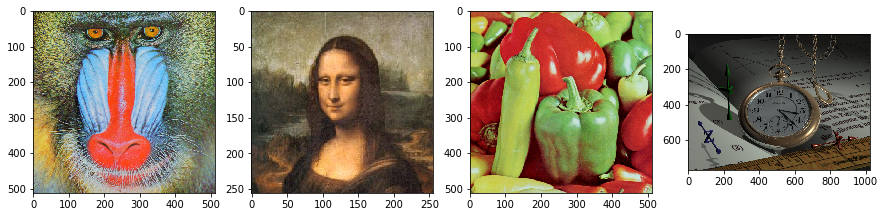

In [7]:
plot_imgs(color_imgs, 1)

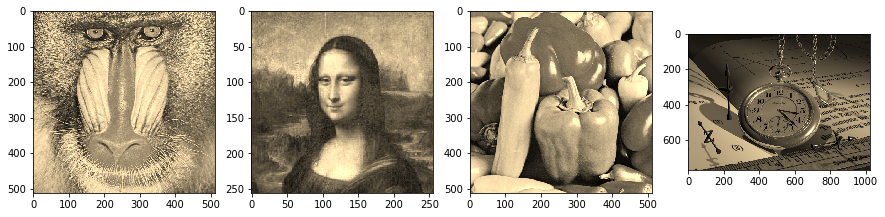

In [8]:
path_results1a = 'imgs/results1a/'

for i, c in zip(color_imgs, range(len(color_imgs))):
    transform_1(i, path_results1a, 'resultado_' + str(c) + '.png')

transform_1a_imgs = [f for f in glob.glob(path_results1a + "*.png")]
plot_imgs(transform_1a_imgs, 1)

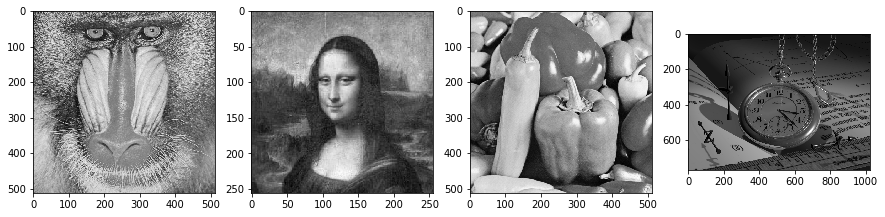

In [9]:
path_results1b = 'imgs/results1b/'

for i, c in zip(color_imgs, range(len(color_imgs))):
    transform_2(i, path_results1b, 'resultado_' + str(c) + '.png')

transform_2b_imgs = [f for f in glob.glob(path_results1b + "*.png")]
plot_imgs(transform_2b_imgs, 1)